In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_frame = pd.read_csv(r"Advanced web dev Data - Sheet1.csv")

In [16]:
data_frame.head()

,Names,Duration (19 March),Duration (20 March),Duration (26 March),Duration (27 March),Duration (2nd April),Duration (3rd April),Duration (9th April),Duration (10th April),Duration (17th April)
0,Mohtashim Ali,27.92,16.33,97.27,0.00,113.32,109.87,112.93,111.65,116.53
1,Muneeb,0.00,79.53,103.55,77.30,102.58,0.00,111.33,103.17,109.92
2,Nasreen,27.13,92.83,113.80,92.15,114.63,119.45,45.95,113.58,117.92
3,Abdul Haseeb,16.58,2.17,95.27,10.83,106.50,94.50,113.33,94.83,94.92
4,Mohsin Najam,20.75,86.95,118.02,91.15,112.37,107.67,112.67,83.15,0.00


In [4]:
data_frame.shape 

(29, 13)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Names                  28 non-null     object 
 1   Phone no               22 non-null     object 
 2   STATUS                 20 non-null     object 
 3   User ID                28 non-null     object 
 4   Duration (19 March)    23 non-null     float64
 5   Duration (20 March)    23 non-null     float64
 6   Duration (26 March)    27 non-null     object 
 7   Duration (27 March)    28 non-null     float64
 8   Duration (2nd April)   27 non-null     float64
 9   Duration (3rd April)   28 non-null     float64
 10  Duration (9th April)   28 non-null     float64
 11  Duration (10th April)  28 non-null     float64
 12  Duration (17th April)  28 non-null     float64
dtypes: float64(8), object(5)
memory usage: 3.1+ KB


In [6]:
data_frame.head()

,Names,Phone no,STATUS,User ID,Duration (19 March),Duration (20 March),Duration (26 March),Duration (27 March),Duration (2nd April),Duration (3rd April),Duration (9th April),Duration (10th April),Duration (17th April)
0,Mohtashim Ali,3474692536,"no ans, msg sent",S62nY8I0p9dBr5Hfijq3wQi5Q143,1675.0,980.0,5836,0.0,6799.0,6592.0,6776.0,6699.0,6992.0
1,Muneeb,NaN,details not found,PkQuhOEzi5gDlPRahCtpHPGjJc63,0.0,4772.0,6213,4638.0,6155.0,0.0,6680.0,6190.0,6595.0
2,Nasreen,966592544577,"internatioal num, msg sent",tU7OZFqHUbfhDYv9xguedchgum83,1628.0,5570.0,6828,5529.0,6878.0,7167.0,2757.0,6815.0,7075.0
3,Abdul Haseeb,3244183179,"num off,msg sent",zUN8y0fbfheLvXCCdnuErauV4cO2,995.0,130.0,5716,650.0,6390.0,5670.0,6800.0,5690.0,5695.0
4,Mohsin Najam,03470214554,"num busy, msg sent",WB1N4UM7X2Mo3okBeikUnV6vKo62,1245.0,5217.0,7081,5469.0,6742.0,6460.0,6760.0,4989.0,0.0


In [7]:
data_frame = data_frame.drop(columns=["User ID"])
data_frame = data_frame.drop(columns=["STATUS"])
data_frame = data_frame.drop(columns=["Phone no"])

# Removing admin and teacher rows
data_frame = data_frame.drop([15, 16, 18, 23, 28])

# Replace NaN values with 0
data_frame = data_frame.fillna(0)

In [8]:
# Converting column "Duration (26 March)" 
# from string to integer so we can convert time from seconds into minutes

data_frame["Duration (26 March)"] = data_frame["Duration (26 March)"].apply(int)

# Converting seconds into minutes 

def seconds_to_minutes(seconds):
    minutes = seconds / 60
    return round(minutes, 2)


for i in range(1, len(data_frame.columns)):
    data_frame.iloc[:, i] = data_frame.iloc[:, i].apply(seconds_to_minutes) 

data_frame

,Names,Duration (19 March),Duration (20 March),Duration (26 March),Duration (27 March),Duration (2nd April),Duration (3rd April),Duration (9th April),Duration (10th April),Duration (17th April)
0,Mohtashim Ali,27.92,16.33,97.27,0.00,113.32,109.87,112.93,111.65,116.53
1,Muneeb,0.00,79.53,103.55,77.30,102.58,0.00,111.33,103.17,109.92
2,Nasreen,27.13,92.83,113.80,92.15,114.63,119.45,45.95,113.58,117.92
3,Abdul Haseeb,16.58,2.17,95.27,10.83,106.50,94.50,113.33,94.83,94.92
4,Mohsin Najam,20.75,86.95,118.02,91.15,112.37,107.67,112.67,83.15,0.00
5,Hamza,27.85,24.43,123.10,33.08,61.17,0.00,37.48,87.25,26.75
6,Waqas Rahman,23.23,30.83,104.02,90.62,106.75,120.38,109.67,108.93,116.08
7,Abdul Qudoos,34.35,34.40,101.67,59.60,6.60,30.83,8.50,12.17,10.43
8,Beenish,18.72,30.55,110.12,92.40,94.70,113.28,115.22,109.00,116.25
9,Ahmed Raza,18.33,83.85,129.08,90.52,110.30,113.45,96.22,97.75,99.65


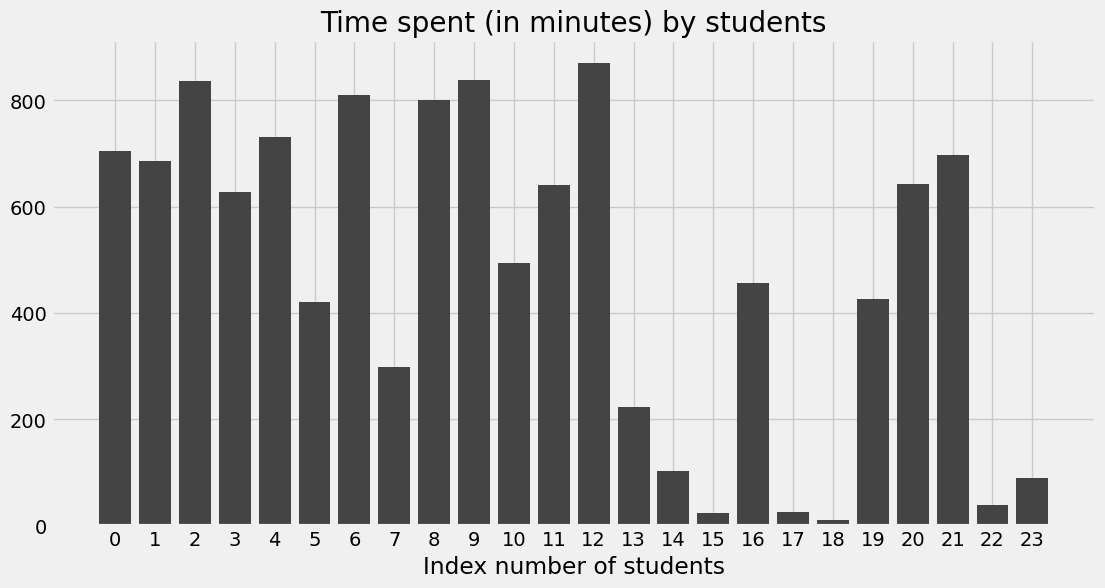

In [9]:
time_spent = []

for i in range(data_frame.shape[0]):
    time_spent.append(int(data_frame.iloc[i, 1::].sum()))


from matplotlib import rcParams

plt.style.use("fivethirtyeight")

# rcParams["figure.figsize"] = 6, 8
plt.figure(figsize=(12, 6))


plt.bar(range(data_frame.shape[0]), time_spent, color="#444444", label="Time Spent")

plt.xticks(np.arange(0, data_frame.shape[0], step=1))
plt.title("Time spent (in minutes) by students")
plt.xlabel("Index number of students")
plt.show()

In [10]:
data_frame.Names

0               Mohtashim Ali
1                      Muneeb
2                     Nasreen
3                Abdul Haseeb
4                Mohsin Najam
5                       Hamza
6                Waqas Rahman
7                Abdul Qudoos
8                     Beenish
9                  Ahmed Raza
10               Fahad Sajjad
11           Muhammad Ukkasha
12                     shahab
13              Fahad Mehmood
14                 Burhan Ali
17               Ghulam Ali  
19          Abdulkarim Ahmed 
20            Muhammad Awais 
21           Sanawar Shahzad 
22            Hamza Iftikhar 
24               Waleed Ahmad
25              Jamshed Iqbal
26    Muhammad Abdullah Habib
27      Shuja Ali Saleemuddin
Name: Names, dtype: object

In [11]:
data_frame_T = data_frame.T

data_frame_T.columns = data_frame_T.iloc[0]
data_frame_T = data_frame_T.drop(data_frame_T.index[0])


# changing index names
data_frame_T.index = ['Mar 19', 'Mar 20', 'Mar 26', 'Mar 27', 'Apr 2', 'Apr 3', 'Apr 9', 'Apr 10', 'Apr 17']


data_frame_T

Names,Mohtashim Ali,Muneeb,Nasreen,Abdul Haseeb,Mohsin Najam,Hamza,Waqas Rahman,Abdul Qudoos,Beenish,Ahmed Raza,...,Burhan Ali,Ghulam Ali,Abdulkarim Ahmed,Muhammad Awais,Sanawar Shahzad,Hamza Iftikhar,Waleed Ahmad,Jamshed Iqbal,Muhammad Abdullah Habib,Shuja Ali Saleemuddin
Mar 19,27.92,0.0,27.13,16.58,20.75,27.85,23.23,34.35,18.72,18.33,...,0.0,23.83,9.97,0.22,10.63,22.17,0.0,0.0,0.0,0.0
Mar 20,16.33,79.53,92.83,2.17,86.95,24.43,30.83,34.4,30.55,83.85,...,103.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mar 26,97.27,103.55,113.8,95.27,118.02,123.1,104.02,101.67,110.12,129.08,...,0.0,0.0,89.18,0.0,0.0,0.0,110.57,97.53,0.0,0.0
Mar 27,0.0,77.3,92.15,10.83,91.15,33.08,90.62,59.6,92.4,90.52,...,0.0,0.0,76.62,0.0,0.0,0.0,93.63,93.35,38.15,89.9
Apr 2,113.32,102.58,114.63,106.5,112.37,61.17,106.75,6.6,94.7,110.3,...,0.0,0.0,0.0,0.0,0.0,64.25,10.8,109.47,0.0,0.0
Apr 3,109.87,0.0,119.45,94.5,107.67,0.0,120.38,30.83,113.28,113.45,...,0.0,0.0,78.17,26.3,0.0,108.5,105.23,109.25,0.0,0.0
Apr 9,112.93,111.33,45.95,113.33,112.67,37.48,109.67,8.5,115.22,96.22,...,0.0,0.0,96.72,0.0,0.0,104.47,114.72,104.83,0.0,0.0
Apr 10,111.65,103.17,113.58,94.83,83.15,87.25,108.93,12.17,109.0,97.75,...,0.0,0.0,1.07,0.0,0.0,0.0,113.03,89.22,0.0,0.0
Apr 17,116.53,109.92,117.92,94.92,0.0,26.75,116.08,10.43,116.25,99.65,...,0.0,0.0,104.72,0.0,0.0,127.0,94.08,95.18,0.0,0.0


## Calculating churn rate based on time spent of student.

In [12]:
# Fill in missing values with 10, unless the sum of the row is zero
for i in range(data_frame_T.shape[0]):   # rows
    for j in range(len(data_frame_T.columns)): # columns
        if data_frame_T.iloc[i::, j].sum() != 0:
            if data_frame_T.iloc[i, j] < 10:
                data_frame_T.iloc[i, j] = 10

# replacing zeros for students who have a time spent of more than 300 minutes
for i in range(len(data_frame_T.columns)):
    if (data_frame_T.iloc[0::, i].sum()) > 300:
        data_frame_T.iloc[0::, i] = data_frame_T.iloc[0::, i].replace(0, 10)


# Number of registered clients
registered_clients = data_frame.Names.count()

# Calculating retention rates
rates = []
for i in range(data_frame_T.shape[0]):
    rates.append(round((((data_frame_T.iloc[i] != 0).value_counts()[True])/registered_clients)*100,0))

data_frame_T["Retention Rates"] = rates

In [13]:
data_frame_T

Names,Mohtashim Ali,Muneeb,Nasreen,Abdul Haseeb,Mohsin Najam,Hamza,Waqas Rahman,Abdul Qudoos,Beenish,Ahmed Raza,...,Ghulam Ali,Abdulkarim Ahmed,Muhammad Awais,Sanawar Shahzad,Hamza Iftikhar,Waleed Ahmad,Jamshed Iqbal,Muhammad Abdullah Habib,Shuja Ali Saleemuddin,Retention Rates
Mar 19,27.92,10,27.13,16.58,20.75,27.85,23.23,34.35,18.72,18.33,...,23.83,10,10,10.63,22.17,10,10,10,10,100.0
Mar 20,16.33,79.53,92.83,10,86.95,24.43,30.83,34.4,30.55,83.85,...,0.0,10,10,0.0,10,10,10,10,10,92.0
Mar 26,97.27,103.55,113.8,95.27,118.02,123.1,104.02,101.67,110.12,129.08,...,0.0,89.18,10,0.0,10,110.57,97.53,10,10,88.0
Mar 27,10,77.3,92.15,10.83,91.15,33.08,90.62,59.6,92.4,90.52,...,0.0,76.62,10,0.0,10,93.63,93.35,38.15,89.9,88.0
Apr 2,113.32,102.58,114.63,106.5,112.37,61.17,106.75,10,94.7,110.3,...,0.0,10,10,0.0,64.25,10.8,109.47,0.0,0.0,79.0
Apr 3,109.87,10,119.45,94.5,107.67,10,120.38,30.83,113.28,113.45,...,0.0,78.17,26.3,0.0,108.5,105.23,109.25,0.0,0.0,79.0
Apr 9,112.93,111.33,45.95,113.33,112.67,37.48,109.67,10,115.22,96.22,...,0.0,96.72,0.0,0.0,104.47,114.72,104.83,0.0,0.0,75.0
Apr 10,111.65,103.17,113.58,94.83,83.15,87.25,108.93,12.17,109.0,97.75,...,0.0,10,0.0,0.0,10,113.03,89.22,0.0,0.0,71.0
Apr 17,116.53,109.92,117.92,94.92,10.0,26.75,116.08,10.43,116.25,99.65,...,0.0,104.72,0.0,0.0,127.0,94.08,95.18,0.0,0.0,71.0


In [14]:
data_frame_T.iloc[:, 24]

Mar 19    100.0
Mar 20     92.0
Mar 26     88.0
Mar 27     88.0
Apr 2      79.0
Apr 3      79.0
Apr 9      75.0
Apr 10     71.0
Apr 17     71.0
Name: Retention Rates, dtype: float64

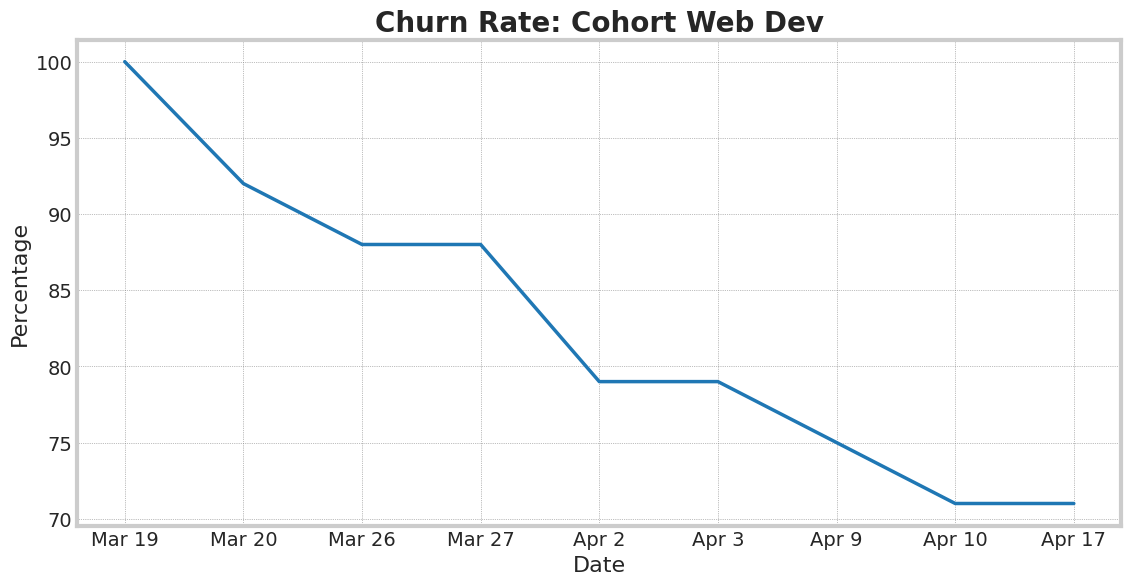

In [15]:
# Set figure size and style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(data_frame_T.iloc[:, 24], linewidth=2.5, color="#1f77b4")

# Add title and labels
plt.title("Churn Rate: Cohort Web Dev", fontsize=20, fontweight="bold")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Percentage", fontsize=16)

# Set ticks and grid
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, color="gray", linestyle=":", linewidth=0.5)


# Show plot
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=95db66e3-2b53-4763-a669-103fa6da0111' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>